In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### A. Base de données

In [115]:
df = pd.read_excel("beer_quality.xlsx")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [116]:
X = df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [117]:
y = df.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [118]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

##### B. Classification binaire

In [120]:
# Calcul de la médiane 
mediane = np.median(np.array(y_train))
mediane

6.0

In [121]:
ybin = []
for i in y:
    if(y[i] < mediane):
        ybin.append(0)
    else:
        ybin.append(1)
new_df = df.assign(y_bin = ybin)
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [122]:
del new_df['quality']
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [123]:
X = new_df.iloc[:, :11]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [124]:
y = new_df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_bin, dtype: int64

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaler = sc.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

data_train_df = (X_train, y_train)

data_test_df = (X_test, y_test)

###### Optimisation rapide d'un arbre de décision

In [127]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

###### Entraînement d'un ensemble d'arbre de décision "faibles" avec AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8579088471849866


###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 1

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))

In [ ]:
from matplotlib import pyplot

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

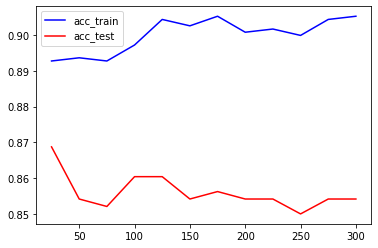

In [ ]:
import pylab

pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

###### Visualisation de l'accuracy en fonction de n_estimators pour MAX_DEPTH = 5

In [ ]:
from matplotlib import pyplot

n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_train = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_train.append(bdt.score(X_train, y_train))

In [ ]:
from matplotlib import pyplot
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
accuracy_test = []

for i in range(len(n_estimators)):
    bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
    )

    # Train Adaboost Classifer
    model = bdt.fit(X_train, y_train)
    accuracy_test.append(bdt.score(X_test, y_test))

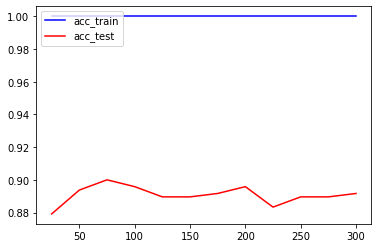

In [ ]:
pylab.plot(n_estimators, accuracy_train, '-b', label='acc_train')
pylab.plot(n_estimators, accuracy_test, '-r', label='acc_test')
pylab.legend(loc='upper left')
pylab.show()

In [ ]:
feature_names = [f"feature {i}" for i in range(X_scaled.shape[1])]
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME", n_estimators=n_estimators[i]
)
model = bdt.fit(X_train, y_train)

Text(0, 0.5, 'Feature')

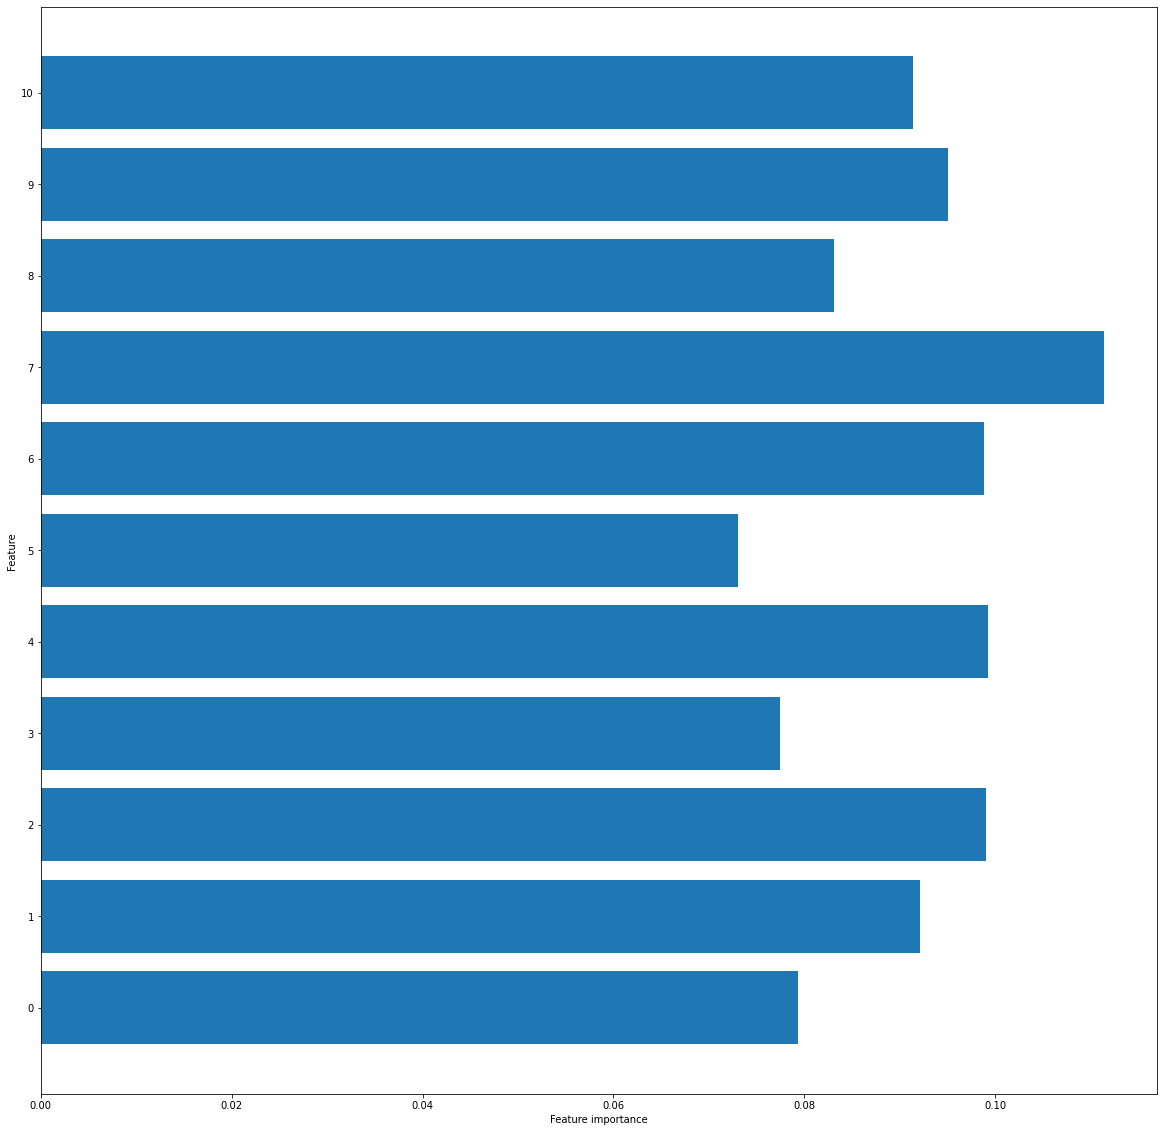

In [ ]:
n_features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(n_features), model.feature_importances_, align='center') 
plt.yticks(np.arange(n_features)) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')


En théorie, avec le boosting, on entraîne nos arbres "en série" qui sont des modèles relativement faibles où chacun est en situation d'underfitting. Donc ici, ce type d'architecture doit permettre de réduire le biais de l'algorithme.

Dans notre cas, après la visualisation des graphes d'accuracy train/test, nous sommes en situation d'underfitting avec un biais haut et une variance haute car l'accuracy en train est supérieure à celle en test. De plus, l'écart entre les deux accuracy est très important.

##### Classification multiclasse

In [ ]:
ymulti = []
for i in y:
    if(y[i] < mediane):
        ymulti.append(0)
    elif(y[i] == mediane):
        ymulti.append(1)
    elif(y[i] > mediane):
        ymulti.append(2)
new_df_bis = df.assign(ymulti = ymulti)
new_df_bis

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ymulti
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
del new_df_bis['quality']
new_df_bis.head()